In [1]:
import pandas as pd

# Load dataset
file_path = 'Online_Retail.csv'
df = pd.read_csv(file_path, encoding='latin-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [2]:
!pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [5]:
# Drop rows where 'InvoiceNo' or 'Description' is missing
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Ensure 'InvoiceNo' is treated as a string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Group by 'InvoiceNo' and collect 'Description' values as lists
transactions = df.groupby('InvoiceNo')['Description'].apply(list).tolist()

# Display sample transactions
print("\nSample transactions:")
for t in tqdm(transactions[:3], desc="Printing sample transactions"):
    print(t)


Sample transactions:


Printing sample transactions: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12710.01it/s]

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']


In [6]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_array, columns=te.columns_)


In [7]:
import threading
import time
from tqdm import tqdm
from mlxtend.frequent_patterns import apriori

# Global variable to store the result
frequent_itemsets = None

def run_apriori():
    global frequent_itemsets
    frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

start_time = time.time()

# Start the apriori computation in a separate thread
thread = threading.Thread(target=run_apriori)
thread.start()

# Create a progress bar that updates until the thread is finished
with tqdm(total=100, desc="Computing frequent itemsets", bar_format='{l_bar}{bar}| {elapsed} elapsed') as pbar:
    while thread.is_alive():
        pbar.update(1)
        time.sleep(0.1)
        if pbar.n >= 100:
            pbar.reset()
thread.join()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nFrequent Itemsets:")
print(frequent_itemsets.head())
print("\nTotal time elapsed: {:.2f} seconds".format(elapsed_time))


Computing frequent itemsets:   6%|████████████▏                                                                                                                                                                                              | 00:00 elapsed


Frequent Itemsets:
    support                               itemsets
0  0.011127     ( SET 2 TEA TOWELS I LOVE LONDON )
1  0.013336               (10 COLOUR SPACEBOY PEN)
2  0.010308      (12 MESSAGE CARDS WITH ENVELOPES)
3  0.014604        (12 PENCIL SMALL TUBE WOODLAND)
4  0.014972  (12 PENCILS SMALL TUBE RED RETROSPOT)

Total time elapsed: 32.30 seconds


In [8]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
print("\nAssociation Rules:")
print(rules.head())



Association Rules:
                             antecedents  \
0      (60 CAKE CASES VINTAGE CHRISTMAS)   
1      (60 CAKE CASES VINTAGE CHRISTMAS)   
2    (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
3  (SET OF 20 VINTAGE CHRISTMAS NAPKINS)   
4      (60 CAKE CASES VINTAGE CHRISTMAS)   

                             consequents  antecedent support  \
0      (PAPER CHAIN KIT 50'S CHRISTMAS )            0.025444   
1    (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.025444   
2      (60 CAKE CASES VINTAGE CHRISTMAS)            0.034034   
3      (60 CAKE CASES VINTAGE CHRISTMAS)            0.025239   
4  (SET OF 20 VINTAGE CHRISTMAS NAPKINS)            0.025444   

   consequent support   support  confidence       lift  representativity  \
0            0.047861  0.011167    0.438907   9.170525               1.0   
1            0.034034  0.010349    0.406752  11.951285               1.0   
2            0.025444  0.010349    0.304087  11.951285               1.0   
3            0.025444  0.0

In [9]:
frequent_itemsets.to_csv('online_retail_frequent_itemsets.csv', index=False)
rules.to_csv('online_retail_association_rules.csv', index=False)
rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])


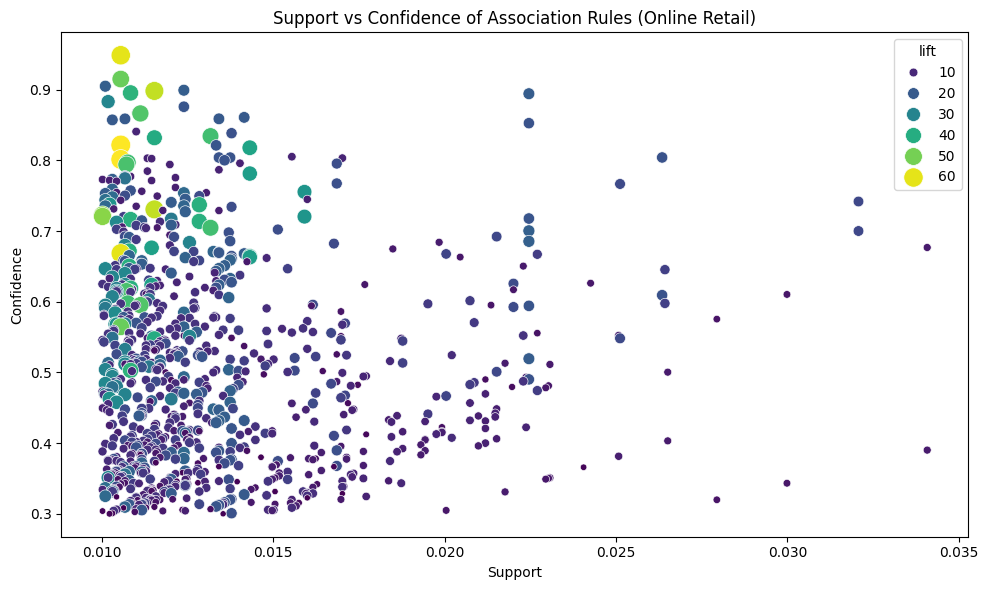

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rules['support'], y=rules['confidence'],
                size=rules['lift'], hue=rules['lift'],
                palette='viridis', sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence of Association Rules (Online Retail)')
plt.tight_layout()
plt.show()
